# Import Required Libraries

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectFromModel, RFE
from xgboost import XGBClassifier

# Load Data

In [77]:
train = pd.read_csv('train_ctrUa4K.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [78]:
test = pd.read_csv('test_lAUu6dG.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [79]:
sub = pd.read_csv('sample_submission_49d68Cx.csv')
sub.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


# EDA

In [80]:
train.shape

(614, 13)

In [81]:
test.shape

(367, 12)

In [82]:
train.duplicated().sum()

0

# Check Null Values

In [83]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [84]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Filling null values

In [85]:
def fill_na(frame):
    for i in frame.columns:
        if(((frame[i].isnull().sum() / len(frame))*100) <= 30) & (frame[i].dtype == 'int64'):
            frame[i] = frame[i].fillna(frame[i].median())
            
        elif(((frame[i].isnull().sum() / len(frame))*100) <= 30) & (frame[i].dtype == 'O'):
            frame[i] = frame[i].fillna(frame[i].mode()[0])
            
        elif(((frame[i].isnull().sum() / len(frame))*100) <= 30) & (frame[i].dtype == 'float64'):
            frame[i] = frame[i].fillna(frame[i].median())
            
fill_na(train)
fill_na(test)

# Check description

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [87]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


# Changing Datatypes

In [88]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype('int64')
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].astype('int64')
train['Credit_History'] = train['Credit_History'].astype('O')
test['Credit_History'] = test['Credit_History'].astype('O')

# Drop Columns

In [89]:
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

# Encode Categorical Features

In [90]:
def encode(dataframe):
    lec = LabelEncoder()
    for j in dataframe.columns:
        if(dataframe[j].dtype == 'object'):
            dataframe[j] = lec.fit_transform(dataframe[j])
            
encode(train)
encode(test)

In [64]:
sc = StandardScaler()
train = sc.fit_transform(x)

# Split Data into train and test

In [63]:
x = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Let's Build Models

# Logistic Regression

In [66]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [67]:
lr_pred = lr.predict(X_test)
print(classification_report(Y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.89      0.41      0.56        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.83      0.69      0.71       185
weighted avg       0.81      0.79      0.76       185



In [68]:
accuracy_score(Y_test, lr_pred)

0.7891891891891892

In [31]:
rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)
# fit the model
rfe.fit_transform(X_train, Y_train)

array([[  1.,   1.,   1., ..., 360.,   1.,   1.],
       [  1.,   1.,   0., ..., 120.,   1.,   1.],
       [  1.,   1.,   2., ..., 180.,   0.,   2.],
       ...,
       [  1.,   0.,   0., ..., 300.,   1.,   1.],
       [  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  0.,   1.,   0., ..., 360.,   1.,   1.]])

# Ada Boost Classifier

In [19]:
ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)

AdaBoostClassifier()

In [20]:
ada_pred = ada.predict(X_test)
print(classification_report(Y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.75      0.44      0.56        61
           1       0.77      0.93      0.84       124

    accuracy                           0.77       185
   macro avg       0.76      0.69      0.70       185
weighted avg       0.76      0.77      0.75       185



# Random Forest Classifier

In [70]:
rf = RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       n_estimators=400)
rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       n_estimators=400)

In [71]:
rf_pred = rf.predict(X_test)
print(classification_report(Y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185



In [126]:
accuracy_score(Y_test, rf_pred)

0.7945945945945946

# XGBoost Classifier

In [91]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='ginni',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=1, max_features='sqrt',
              min_child_weight=1, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb.fit(X_train, Y_train)

[22:39:39] WARNING: ..\src\learner.cc:541: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:39:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='ginni',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=1, max_features='sqrt',
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
xgb_pred = xgb.predict(X_test)
print(classification_report(Y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.78      0.41      0.54        61
           1       0.76      0.94      0.84       124

    accuracy                           0.77       185
   macro avg       0.77      0.68      0.69       185
weighted avg       0.77      0.77      0.74       185



# SVC

In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)

In [145]:
svc_pred = svc.predict(X_test)
print(classification_report(Y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185



# KNN

In [27]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [28]:
knn_pred = knn.predict(X_test)
print(classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.39      0.18      0.25        61
           1       0.68      0.86      0.76       124

    accuracy                           0.64       185
   macro avg       0.54      0.52      0.50       185
weighted avg       0.59      0.64      0.59       185



In [142]:
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

GradientBoostingClassifier()

In [143]:
gb_pred = gb.predict(X_test)
print(classification_report(Y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.82      0.44      0.57        61
           1       0.78      0.95      0.86       124

    accuracy                           0.78       185
   macro avg       0.80      0.70      0.71       185
weighted avg       0.79      0.78      0.76       185



# Stacking Classifier

In [130]:
estimators = [
    ('lr' , LogisticRegression(max_iter = 1000)),
    ('xgb', XGBClassifier()),
    ('rf' , RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       n_estimators=400)),
    ('ada' , AdaBoostClassifier())
]

stack = StackingClassifier(estimators=estimators)
stack.fit(X_train, Y_train)

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:11:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:11:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:11:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:11:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:11:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constra

In [131]:
stack_pred = stack.predict(X_test)
print(classification_report(Y_test, stack_pred))

              precision    recall  f1-score   support

           0       0.93      0.41      0.57        61
           1       0.77      0.98      0.87       124

    accuracy                           0.79       185
   macro avg       0.85      0.70      0.72       185
weighted avg       0.82      0.79      0.77       185



In [132]:
accuracy_score(Y_test, stack_pred)

0.7945945945945946

# Submission File

In [138]:
test['Loan_Status2'] = stack.predict(test)

In [140]:
submit = pd.DataFrame({
    'Loan_ID' : sub['Loan_ID'],
    'Loan_Status' : test['Loan_Status']
})
submit.to_csv('Submition.csv', index=False)

In [134]:
test = test.drop('Loan_Status', axis=1)

In [35]:
grid = {
    'n_estimators' : [200, 400, 600, 800, 1000],
    'criterion' : ['ginni', 'entropy'],
    'max_depth' : [1, 2, 3, 4, 5],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [36]:
random_cv = RandomizedSearchCV(rf,
                              grid,
                              cv=5,
                              n_iter=50,
                              n_jobs=-1,
                              scoring='accuracy',
                              random_state=1,
                              verbose=5)

In [37]:
random_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['ginni', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=1, scoring='accuracy', verbose=5)

In [38]:
random_cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       n_estimators=400)

In [65]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2,3,4,5,10,15]
booster = ['gbtree', 'gblinear']
learning_rate = [0.05, 0,1,0.15,0.20]
base_score = [0.25, 0.5, 0.75, 1]

hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'learning_rate' : learning_rate,
    'booster' : booster,
    'base_score' : base_score
}

In [68]:
xrandom_cv = RandomizedSearchCV(estimator = xgb,
                              param_distributions = hyperparameter_grid,
                              cv=5,
                              n_iter=50, 
                              scoring='accuracy',
                              n_jobs=4,
                              verbose=5,
                              return_train_score=True,
                              random_state=4)

In [69]:
xrandom_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done  72 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done 162 tasks      | elapsed:   26.6s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   36.7s finished
C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:38] WARNING: ..\src\learner.cc:541: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:15:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           criterion='ginni', gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=1,
                                           max_features='sqrt',
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints...
                                           scale_pos_weight=1, subsample=1,
                                           tree_method='exact

In [70]:
xrandom_cv.best_estimator_

XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='ginni',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.15, max_delta_step=0,
              max_depth=10, max_features='sqrt', min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=4, num_parallel_tree=1, random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [139]:
listt = list(test['Loan_Status2'])
convertt = []
for c in listt:
    if(c == 1):
        convertt.append('Y')
    else:
        convertt.append('N')
test['Loan_Status'] = convertt

In [137]:
test = test.drop('Loan_Status2', axis=1)

In [136]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status2
0,5720,0,110.0,360,1,1
1,3076,1500,126.0,360,1,1
2,5000,1800,208.0,360,1,1
3,2340,2546,100.0,360,1,1
4,3276,0,78.0,360,1,1


In [93]:
gnb_pred = gnb.predict(X_test)
mean_squared_error(Y_test, gnb_pred, squared=False)

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:43:18] WARNING: ..\src\learner.cc:541: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:43:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold: 0.0 Model Score: 0.7189189189189189
[22:43:19] WARNING: ..\src\learner.cc:541: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:43:19] WARN

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.0 Model Score: 0.7189189189189189
[22:43:19] WARNING: ..\src\learner.cc:541: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:43:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.025342602 Model Score: 0.7297297297297297
[22:43:20] WARNING: ..\src\learner.cc:541: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:43:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.025646979 Model Score: 0.7621621621621621
[22:43:21] WARNING: ..\src\learner.cc:541: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:43:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.028806338 Model Score: 0.7783783783783784
[22:43:21] WARNING: ..\src\learner.cc:541: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:43:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.030322334 Model Score: 0.7675675675675676
[22:43:22] WARNING: ..\src\learner.cc:541: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:43:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.043088254 Model Score: 0.7783783783783784
[22:43:22] WARNING: ..\src\learner.cc:541: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:43:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.044664156 Model Score: 0.7837837837837838
[22:43:23] WARNING: ..\src\learner.cc:541: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:43:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.05749038 Model Score: 0.7837837837837838
[22:43:24] WARNING: ..\src\learner.cc:541: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:43:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.05987342 Model Score: 0.7783783783783784
[22:43:24] WARNING: ..\src\learner.cc:541: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:43:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.6847656 Model Score: 0.7891891891891892


In [104]:
imp = pd.DataFrame(rf.feature_importances_)
imp.index = X_train.columns
imp[imp[0] < 0.04950819132150283]

,0
Gender,0.007466
Married,0.018370
Dependents,0.034471
Education,0.020994
Self_Employed,0.010184
Property_Area,0.042782


In [117]:
train = train.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], axis=1)
test = test.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], axis=1)

<AxesSubplot:>

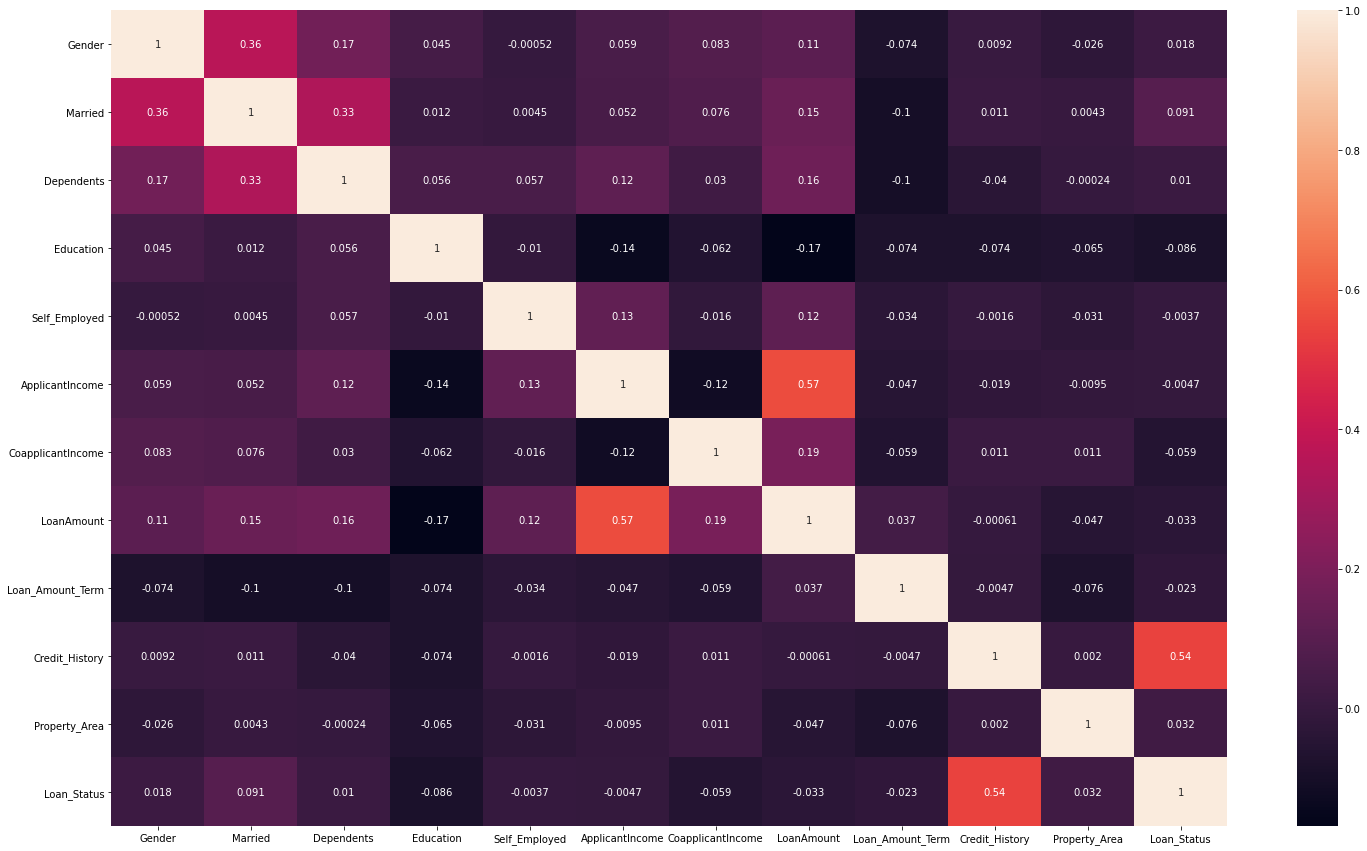

In [107]:
plt.figure(figsize=(25,15))
sns.heatmap(train.corr(), annot=True)

In [69]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360,1,2
1,1,1,1,0,0,4583,1508.0,128.0,360,1,0
2,1,1,0,0,1,3000,0.0,66.0,360,1,2
3,1,1,0,1,0,2583,2358.0,120.0,360,1,2
4,1,0,0,0,0,6000,0.0,141.0,360,1,2
